# Solutions of Optimization Homework.

[Juan Sebastián Corredor Rodriguez](https://github.com/juanse1608) - jucorredor@unal.edu.co

This notebook contents the solution of the homework about optimization found in

In [74]:
#Loading the required libraries
import numpy as np
import pandas as pd
import scipy as sc
import time
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Problem 1: The Styblinski-Tang Function.

Minimize the next function using BFGS, Conjugate Gradient and L-BFGS and compare the results:
\begin{align*}
f(x_1,\ldots,x_n) &= \frac{1}{2}\sum_{i=1}^{n} (x_i^4-16x_i^2+5x_i) \:\:\:\:\text{Styblinski-Tang Function}
\end{align*}
Evaluate the behavior of the algorithms as:

1. The dimension $n$ goes to infinity i.e. $n \to \infty$.
2. Changes the initial value $x_0$.

__Solution.__ Let's write the Styblinski-Tang Function in Python:

In [44]:
#The function written in python
def sty_tang(x):
    return 1/2*sum(x**4-16*x**2+5*x)

In [62]:
#We define a dimension and an initial value
dimension = 10
initial_value = 100
initial_x = np.repeat(initial_value , dimension)

Let's see the bahavior of this algorithms in terms of time:

In [27]:
%%timeit -n10 -r1
#It counts the avg time after doing 10 iterations
min_bfgs = minimize(sty_tang, initial_x , method='BFGS', options={'disp': False})

66.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [28]:
%%timeit -n10 -r1
#It counts the avg time after doing 10 iterations
min_cg = minimize(sty_tang, initial_x , method='CG', options={'disp': False})

8.35 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [29]:
%%timeit -n10 -r1
#It counts the avg time after doing 10 iterations
min_lbfgs = minimize(sty_tang, initial_x , method='L-BFGS-B', options={'disp': False})

7.23 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


The CG and L-BFGS methods took approx 8.4 ms and 7.2 ms respectively. On the other hand, BFGS took 66 ms approximately. It's clear that CG and L-BFGS take less time than BFGS, but know let's see the results of the algorithms.

In [63]:
min_bfgs = minimize(sty_tang, initial_x , method='BFGS', options={'disp': False})
min_cg = minimize(sty_tang, initial_x , method='CG', options={'disp': False})
min_lbfgs = minimize(sty_tang, initial_x , method='L-BFGS-B', options={'disp': False})

In [64]:
print('Results for BFGS: ', min_bfgs.message, ' The minimum is f(x) = ',
       min_bfgs.fun, '\n\nwith x = ', np.round(min_bfgs.x,2)) 

Results for BFGS:  Optimization terminated successfully.  The minimum is f(x) =  -250.29446655283647 

with x =  [2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75]


In [65]:
print('Results for CG: ', min_cg.message, ' The minimum is f(x) = ',
       min_cg.fun, '\n\nwith x = ', np.round(min_cg.x,2)) 

Results for CG:  Desired error not necessarily achieved due to precision loss.  The minimum is f(x) =  140419253.04471308 

with x =  [72.85 72.85 72.85 72.85 72.85 72.85 72.85 72.85 72.85 72.85]


In [71]:
print('Results for L-BFGS: Does the optimization terminate successfully? ', np.str(min_lbfgs.success) + '.' ,
      'The minimum is f(x) = ',
       min_lbfgs.fun, '\n\nwith x = ', np.round(min_lbfgs.x,2)) 

Results for L-BFGS: Does the optimization terminate successfully?  True. The minimum is f(x) =  -250.2944665528392 

with x =  [2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75]


1. It is clear that both BFGS and L-BFGS reach a local minimum successfully. Whereas CG does not appear to converge and (intuitively) does not reach a local minimum.

2. It looks like our function does not reach the global minimum $f(x^*)=-39.16d$ with $x^*=(-2.9,\ldots,-2.9)$ no matter the algorithm. But, what is happening? Let's find out.

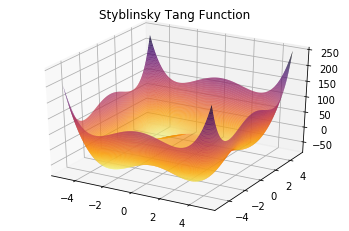

In [109]:
#Let's plot our function when x is two-dimensional and see what we get
x = np.linspace(-5, 5, 250)
y = np.linspace(-5, 5, 250)
x, y = np.meshgrid(x, y)
z = sty_tang(np.array([x,y]))

ax = plt.axes(projection='3d')
ax.set_title('Styblinsky Tang Function')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='inferno_r', edgecolor='none')

It looks that our function has four local minimums (one being the global). So, it is natural that the algorithms does not reach the global minimum under certain initial values. Now, let's evaluate some initial values and see the bahavior of the algorithms.

__What if we set initial value nearer to any local minimum?__

In [172]:
initial_value = -100
while initial_value <= -5:
    initial_x = np.repeat(initial_value , dimension)
    min_bfgs = minimize(sty_tang, initial_x , method='BFGS', options={'disp': False})
    print('\nInitial Value: ', initial_x, '\nResults for BFGS: ', min_bfgs.message, ' The minimum is f(x) = ',
           np.round(min_bfgs.fun, 2), '\nwith x = ', np.round(min_bfgs.x,2)) 
    initial_value += 10


Initial Value:  [-100 -100 -100 -100 -100 -100 -100 -100 -100 -100] 
Results for BFGS:  Desired error not necessarily achieved due to precision loss.  The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-90 -90 -90 -90 -90 -90 -90 -90 -90 -90] 
Results for BFGS:  Optimization terminated successfully.  The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-80 -80 -80 -80 -80 -80 -80 -80 -80 -80] 
Results for BFGS:  Optimization terminated successfully.  The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-70 -70 -70 -70 -70 -70 -70 -70 -70 -70] 
Results for BFGS:  Optimization terminated successfully.  The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-60 -60 -60 -60 -60 -60 -60 -60 -60 -60] 
Results for BFGS:  Optimization terminated successfully.  

In [171]:
initial_value = -100
while initial_value <= 0:
    initial_x = np.repeat(initial_value , dimension)
    min_cg = minimize(sty_tang, initial_x , method='CG', options={'disp': False})
    print('\nInitial Value: ', initial_x, '\nResults for CG: ', min_cg.message, ' The minimum is f(x) = ',
           np.round(min_cg.fun, 2), '\nwith x = ', np.round(min_cg.x,2)) 
    initial_value += 10 


Initial Value:  [-100 -100 -100 -100 -100 -100 -100 -100 -100 -100] 
Results for CG:  Desired error not necessarily achieved due to precision loss.  The minimum is f(x) =  140415610.45 
with x =  [-72.85 -72.85 -72.85 -72.85 -72.85 -72.85 -72.85 -72.85 -72.85 -72.85]

Initial Value:  [-90 -90 -90 -90 -90 -90 -90 -90 -90 -90] 
Results for CG:  Desired error not necessarily achieved due to precision loss.  The minimum is f(x) =  77708906.94 
with x =  [-62.85 -62.85 -62.85 -62.85 -62.85 -62.85 -62.85 -62.85 -62.85 -62.85]

Initial Value:  [-80 -80 -80 -80 -80 -80 -80 -80 -80 -80] 
Results for CG:  Optimization terminated successfully.  The minimum is f(x) =  -250.29 
with x =  [2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75]

Initial Value:  [-70 -70 -70 -70 -70 -70 -70 -70 -70 -70] 
Results for CG:  Optimization terminated successfully.  The minimum is f(x) =  -250.29 
with x =  [2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75]

Initial Value:  [-60 -60 -60 -60 -60 -60 -60 -60 -60

In [173]:
initial_value = -100
while initial_value <= -5:
    initial_x = np.repeat(initial_value , dimension)
    min_lbfgs = minimize(sty_tang, initial_x , method='L-BFGS-B', options={'disp': False})
    print('\nInitial Value: ', initial_x, '\nResults for L-BFGS: Does the optimization terminate successfully? ',
           np.str(min_lbfgs.success) + '.' ,
          'The minimum is f(x) = ',
           np.round(min_lbfgs.fun, 2), '\nwith x = ', np.round(min_lbfgs.x,2)) 
    initial_value += 10 


Initial Value:  [-100 -100 -100 -100 -100 -100 -100 -100 -100 -100] 
Results for L-BFGS: Does the optimization terminate successfully?  True. The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-90 -90 -90 -90 -90 -90 -90 -90 -90 -90] 
Results for L-BFGS: Does the optimization terminate successfully?  True. The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-80 -80 -80 -80 -80 -80 -80 -80 -80 -80] 
Results for L-BFGS: Does the optimization terminate successfully?  True. The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-70 -70 -70 -70 -70 -70 -70 -70 -70 -70] 
Results for L-BFGS: Does the optimization terminate successfully?  True. The minimum is f(x) =  -391.66 
with x =  [-2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9 -2.9]

Initial Value:  [-60 -60 -60 -60 -60 -60 -60 -60 -60 -60] 
Results for L-BFGS: Do

In this particular case, mantaining constant the dimension, it's clear that BFGS and L-BFGS are stronger that CG, since they both converge far from the respective minimum. 

On the other hand, CG needs to be closer to the initial value in order to converge to a local minimum. 

But, How does dimension affect the solution? Let's see it:

First let's see how dimension affects the time of the algorithms

In [174]:
#BFGS performance (time) as dimension increases
initial_value = -10
result_bfgs = []
for dim in range(25):
    #if dim % 5 == 0:
        #print(dim)
    times_bfgs = []
    initial_x = np.repeat(initial_value, dim + 2)
    for i in range(10):
        start = time.perf_counter()
        res = minimize(sty_tang, initial_x , method='BFGS', options={'disp': False})
        end = time.perf_counter()
        times_bfgs.append(end-start)
    result_bfgs.append(np.array(times_bfgs).mean())

In [175]:
#CG performance (time) as dimension increases
initial_value = -10
result_cg = []
for dim in range(25):
    #if dim % 5 == 0:
        #print(dim)
    times_cg = []
    initial_x = np.repeat(initial_value, dim + 2)
    for i in range(10):
        start = time.perf_counter()
        res = minimize(sty_tang, initial_x , method='CG', options={'disp': False})
        end = time.perf_counter()
        times_cg.append(end-start)
    result_cg.append(np.array(times_cg).mean())

In [176]:
#L-BFGS performance (time) as dimension increases
initial_value = -10
result_lbfgs = []
for dim in range(25):
    #if dim % 5 == 0:
        #print(dim)
    times_lbfgs = []
    initial_x = np.repeat(initial_value, dim + 2)
    for i in range(10):
        start = time.perf_counter()
        res = minimize(sty_tang, initial_x , method='L-BFGS-B', options={'disp': False})
        end = time.perf_counter()
        times_lbfgs.append(end-start)
    result_lbfgs.append(np.array(times_lbfgs).mean())

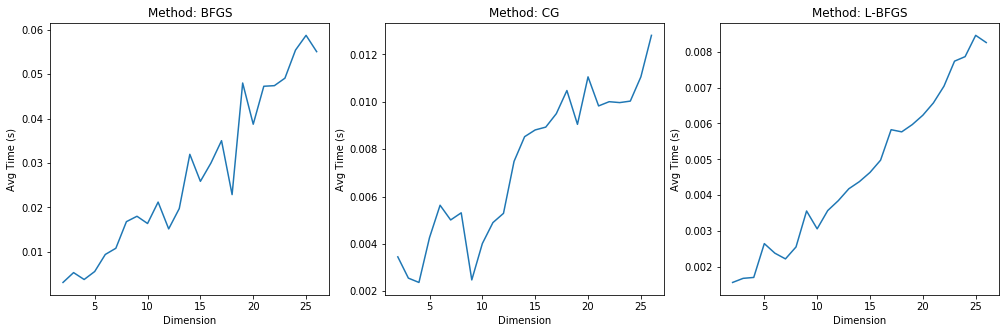

In [177]:
#Time vs Dimension PLOTS
plt.subplots(figsize=(17,5))

plt.subplot(131)
plt.plot(np.array(range(25))+2, result_bfgs)
plt.ylabel('Avg Time (s)')
plt.xlabel('Dimension')
plt.title('Method: BFGS')

plt.subplot(132)
plt.plot(np.array(range(25))+2, result_cg)
plt.ylabel('Avg Time (s)')
plt.xlabel('Dimension')
plt.title('Method: CG')

plt.subplot(133)
plt.plot(np.array(range(25))+2, result_lbfgs)
plt.ylabel('Avg Time (s)')
plt.xlabel('Dimension')
plt.title('Method: L-BFGS')
plt.show()


All the methods are being affected by dimension. However, the method less affected is L-BFGS.

Now, let's see how dimension affects convergence of the problem. 

In [201]:
#Dimension vs Convergence
dim = 5
initial_value = 10
converge = True
while converge == True:
    initial_x = np.repeat(initial_value , dim)
    min_bfgs = minimize(sty_tang, initial_x , method='BFGS', options={'disp': False})
    if min_bfgs.success == False:
        print('BFGS fails to converge for the first time at dimension', dim)
        converge = False
    dim += 1

BFGS fails to converge for the first time at dimension 26


In [202]:
#Dimension vs Convergence
dim = 5
initial_value = 10
converge = True
while converge == True:
    initial_x = np.repeat(initial_value , dim)
    min_cg = minimize(sty_tang, initial_x , method='CG', options={'disp': False})
    if min_cg.success == False:
        print('CG fails to converge for the first time at dimension', dim)
        converge = False
    dim += 1

CG fails to converge for the first time at dimension 28


In [203]:
#Dimension vs Convergence
dim = 5
initial_value = 10
converge = True
while converge == True:
    initial_x = np.repeat(initial_value , dim)
    min_lbfgs = minimize(sty_tang, initial_x , method='L-BFGS-B', options={'disp': False})
    if min_lbfgs.success == False:
        print('L-BFGS fails to converge for the first time at dimension', dim)
        converge = False
    dim += 1
#Be careful, this cell takes a good time to run maybe do dim += 10     

L-BFGS fails to converge for the first time at dimension 956


This allows us to see that both BFGS and CG fail to converge at dimension 26 and 28 respectively (result very similar). Whereas L-BFGS fails to converge at dimension 956! 

It's incredible. When it comes to dimension, there is a clear winner: __L-BFGS__.

## Problem 2: The Himmelblau Function.

Consider the Himmelblau Function:
\begin{align*}
    f(x,y) &= (x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}
\end{align*}

This function has four values $(x,y)$ that reach the global minimum, that can be founded in https://en.wikipedia.org/wiki/Test_functions_for_optimization.

For each one of the algorithms of Problem 1: Report the results as the initial value changes in the following way:
\begin{align*}
    -5 \leq &x \leq 5 \\ 
    -5 \leq &y \leq 5
\end{align*}

What's my idea? To show, for each algorithm, a color matrix between 
\begin{align*}
    -5 \leq &x \leq 5 \\ 
    -5 \leq &y \leq 5
\end{align*}
where a square have color $i$ if converge to the global minimum reached by $x_i^*$.

In [205]:
#The Himmelblau Function written in python
def himmelblau(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

In [226]:
#The x's and y's taken for doing the color matrix
partitions = 50
x = np.linspace(-5, 5, partitions)
y = np.linspace(-5, 5, partitions)
x, y = np.meshgrid(x, y)
print(x.shape, y.shape)

(50, 50) (50, 50)


In [227]:
min_bfgs = []
for index_a in range(partitions):
    for index_b in range(partitions):
        initial_x = [x[index_a, index_b], y[index_a, index_b]]
        min_bfgs.append(minimize(sty_tang, initial_x, method='BFGS', options={'disp': False}))

In [232]:
states = []
minimums_bfgs = []
for mini in range(len(min_bfgs)):
    states.append(min_bfgs[mini].success)
    minimums_bfgs.append(np.round(min_bfgs[mini].x, 1))
states = np.array(states)    

In [231]:
#Check that the algorithm always converges
np.all(states)

True

In [244]:
#TO DO: Color Matrix